사용할 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

pandas DataFrame으로 데이터 불러오기

In [2]:
# loading the data from csv file to Pandas DataFrame
big_mart_data = pd.read_csv('big_mart_sales_train.csv')

In [3]:

big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# 데이터 갯수 및 피처 개수 보기
big_mart_data.shape

(8523, 12)

In [5]:
# 데이터셋 정보 보기
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Categorical Features:
# Item_Identifier           # 제품ID
# Item_Fat_Content          # 저지장제품
# Item_Type                 # 제품이 속한 카테고리
# Outlet_Identifier         # 상점ID
# Outlet_Size               # 상점규모
# Outlet_Location_Type      # 상점이 위치한 도시의 유형
# Outlet_Type               # 상점의 유형 (식료품점인지, 슈퍼마켓인지)

In [7]:
# null값 찾기
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

1. null 값 처리하기
2. null 값을  평균 값으로 대체하기

In [8]:
#  Item_Weight의 평균값 구하기
big_mart_data['Item_Weight'].mean()

12.857645184136183

In [9]:
# item_weight nan값에 평균 값 넣기
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [10]:
#  Outlet_Size value 값이 high, medium, small 값으로 나타냄으로 최빈값을 구하기
big_mart_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [11]:
# Outlet_Size value 값 최빈값인 'medium'으로 채우기
big_mart_data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# nan 값 확인하기
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Data Analysis

In [13]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
big_mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [15]:
big_mart_data.rename(columns={'Item_Identifier': '제품고유ID','Item_Weight': '제품무게', 'Item_Fat_Content':'저지방구분', 'Item_Visibility':'제품가시성', 'Item_Type':'제품카테고리','Item_MRP':'제품최대가격','Outlet_Identifier':'상점ID','Outlet_Establishment_Year':'설립연도','Outlet_Size':'매장규모','Outlet_Location_Type':'도시유형','Outlet_Type':'매장의유형','Item_Outlet_Sales':'매장에서의제품판매량'}, inplace=True)


In [16]:
big_mart_data.head(3)

,제품고유ID,제품무게,저지방구분,제품가시성,제품카테고리,제품최대가격,상점ID,설립연도,매장규모,도시유형,매장의유형,매장에서의제품판매량
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


수치 피쳐

In [17]:
sns.set()
plt.rc('font', family='Malgun Gothic')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


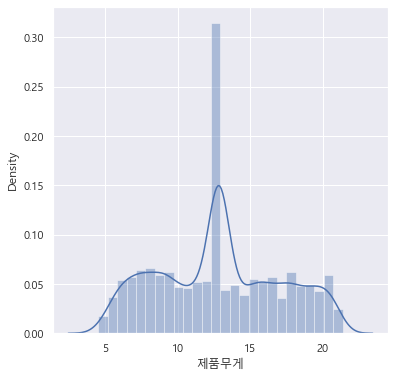

In [18]:
# Item_Weight 분포
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['제품무게'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


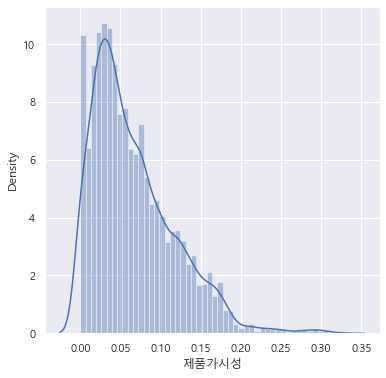

In [19]:
# Item Visibility 분포
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['제품가시성'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


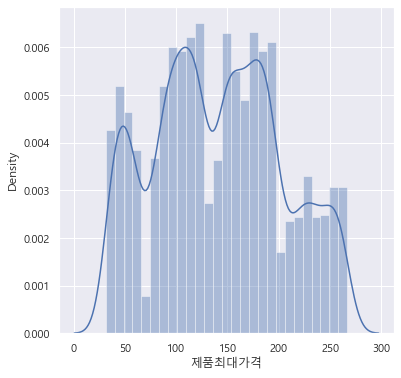

In [20]:
# Item MRP 분포
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['제품최대가격'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


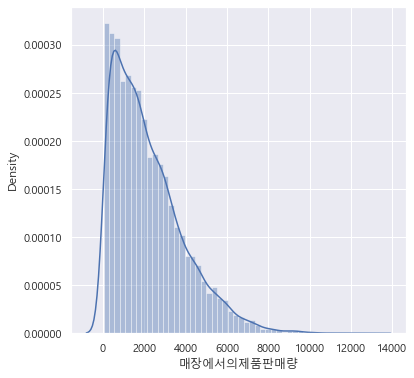

In [21]:
# 매장에서의제품판매량 분포
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['매장에서의제품판매량'])
plt.show()

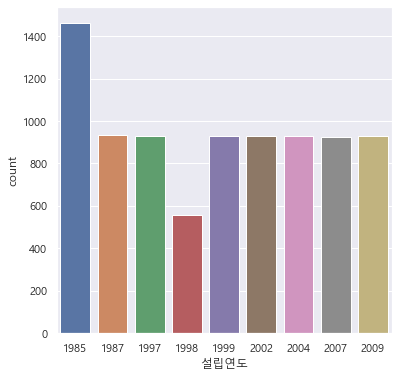

In [22]:
# 설립연도 
plt.figure(figsize=(6,6))
sns.countplot(x='설립연도', data=big_mart_data)
plt.show()

카테고리별 피쳐

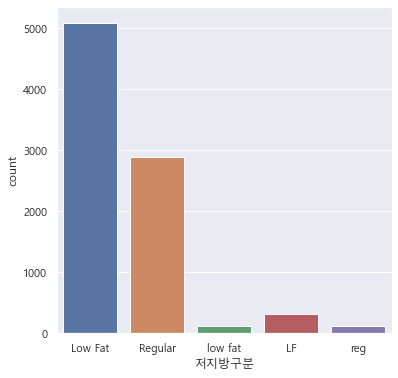

In [23]:
# 저지방구분
plt.figure(figsize=(6,6))
sns.countplot(x='저지방구분', data=big_mart_data)
plt.show()

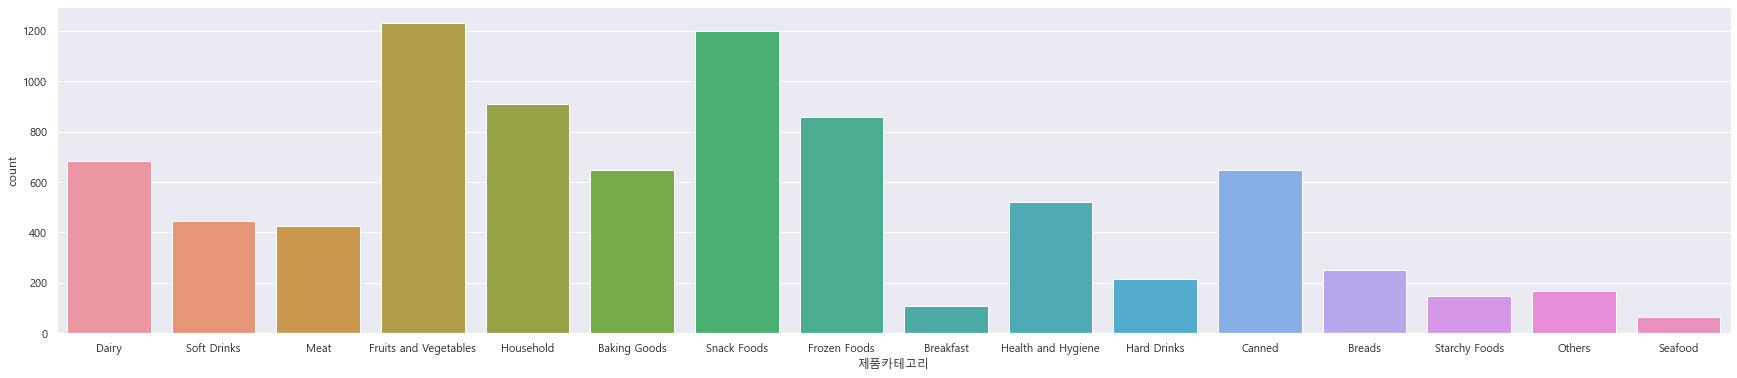

In [25]:
# 제품카테고리 column
plt.figure(figsize=(30,6))
sns.countplot(x='제품카테고리', data=big_mart_data)
plt.show()

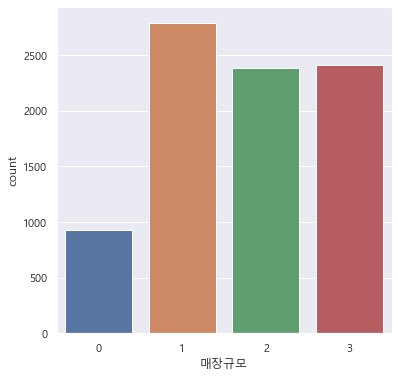

In [35]:
# 매장규모 
plt.figure(figsize=(6,6))
sns.countplot(x='매장규모', data=big_mart_data)
plt.show()

데이터 전처리

In [26]:
big_mart_data.head()

,제품고유ID,제품무게,저지방구분,제품가시성,제품카테고리,제품최대가격,상점ID,설립연도,매장규모,도시유형,매장의유형,매장에서의제품판매량
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
big_mart_data['저지방구분'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: 저지방구분, dtype: int64

In [28]:
big_mart_data.replace({'저지방구분': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [29]:
big_mart_data['저지방구분'].value_counts()

Low Fat    5517
Regular    3006
Name: 저지방구분, dtype: int64

Label Encoding : 범주형 변수의 문자열을 수치형으로 변환

In [31]:
encoder = LabelEncoder()

In [32]:
big_mart_data['제품고유ID'] = encoder.fit_transform(big_mart_data['제품고유ID'])

big_mart_data['저지방구분'] = encoder.fit_transform(big_mart_data['저지방구분'])

big_mart_data['제품카테고리'] = encoder.fit_transform(big_mart_data['제품카테고리'])

big_mart_data['상점ID'] = encoder.fit_transform(big_mart_data['상점ID'])

big_mart_data['매장규모'] = encoder.fit_transform(big_mart_data['매장규모'])

big_mart_data['도시유형'] = encoder.fit_transform(big_mart_data['도시유형'])

big_mart_data['매장의유형'] = encoder.fit_transform(big_mart_data['매장의유형'])

In [33]:
big_mart_data.head()

,제품고유ID,제품무게,저지방구분,제품가시성,제품카테고리,제품최대가격,상점ID,설립연도,매장규모,도시유형,매장의유형,매장에서의제품판매량
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


데이터 구분

In [44]:
X = big_mart_data.drop(columns='매장에서의제품판매량', axis=1)
y = big_mart_data['매장에서의제품판매량']

In [45]:
print(X)

      제품고유ID    제품무게  저지방구분     제품가시성  제품카테고리    제품최대가격  상점ID  설립연도  매장규모  \
0        156   9.300      0  0.016047       4  249.8092     9  1999     1   
1          8   5.920      1  0.019278      14   48.2692     3  2009     1   
2        662  17.500      0  0.016760      10  141.6180     9  1999     1   
3       1121  19.200      1  0.000000       6  182.0950     0  1998     3   
4       1297   8.930      0  0.000000       9   53.8614     1  1987     0   
...      ...     ...    ...       ...     ...       ...   ...   ...   ...   
8518     370   6.865      0  0.056783      13  214.5218     1  1987     0   
8519     897   8.380      1  0.046982       0  108.1570     7  2002     3   
8520    1357  10.600      0  0.035186       8   85.1224     6  2004     2   
8521     681   7.210      1  0.145221      13  103.1332     3  2009     1   
8522      50  14.800      0  0.044878      14   75.4670     8  1997     2   

      도시유형  매장의유형  
0        0      1  
1        2      2  
2        0     

In [51]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: 매장에서의제품판매량, Length: 8523, dtype: float64


데이터/훈련 데이터셋 나누기

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


머신러닝 모델 훈련

LenearRegression Model

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
lr.score(X_test, y_test)

0.5017604501812704

In [66]:
# 테스트셋 결과 예측
pred_lr = lr.predict(X_test)
pred_lr

array([2970.87026582, 1296.80289748, 1541.24014436, ..., 1283.41007411,
        839.94929396, 1531.51056733])

In [68]:
for feature in big_mart_data.columns[:-1]:
    X = big_mart_data[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X,y)
    score = lr.score(X,y)
    print(f'{feature}: \t{score:.4f}')

제품고유ID: 	0.0000
제품무게: 	0.0001
저지방구분: 	0.0004
제품가시성: 	0.0165
제품카테고리: 	0.0003
제품최대가격: 	0.3221
상점ID: 	0.0263
설립연도: 	0.0024
매장규모: 	0.0297
도시유형: 	0.0080
매장의유형: 	0.1612


In [69]:
from sklearn.metrics import mean_squared_error
mase_lr = mean_squared_error(y_test, pred_lr)
mase_lr

1439098.3484498695

SVR

In [72]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, pred_svr)
mse_svr

3061168.207996973

RandomFrestRegressor

In [73]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2021)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, pred_rfr)
mse_rfr

1307966.8108257512

MSE 비교

In [75]:
big_mart_data = pd.DataFrame({'y_test' : y_test, 'LR': pred_lr, 'SVR':pred_svr, 'rfr' : pred_rfr})
big_mart_data.head()

,y_test,LR,SVR,rfr
819,3942.8676,2970.870266,1801.683636,2504.959314
3828,1086.5856,1296.802897,1780.713186,1395.423588
4979,1569.9564,1541.240144,1792.458564,1355.515536
3876,5033.4480,2923.253707,1806.447444,3589.753912
927,1569.9564,2813.069506,1782.732967,3068.385906


XGBoost

In [50]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

평가하기

In [55]:
# 트레이닝데이터 예측
training_data_pred = xgb.predict(X_train)

In [56]:
# R squared feature
r2_train = metrics.r2_score(y_train, training_data_pred)

In [57]:
print('R Squared value = ', r2_train)

R Squared value =  0.8695852042698059


In [59]:
# 테스트 데이터 예측
test_data_pred = xgb.predict(X_test)

In [60]:
# R squared Value
r2_test = metrics.r2_score(y_test, test_data_pred)

In [61]:
print('R Squared value = ', r2_test)

R Squared value =  0.5147777148972924
